In [1]:
import pandas as pd
# Loading data into pandas dataframe
df = pd.read_csv('agaricus-lepiota.data')
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [2]:
# Finding all unique rows of edibility x habitat
df.groupby(['edibility', 'habitat']).size().reset_index(name='count').sort_values('count', ascending=False)

,edibility,habitat,count
0,e,d,1880
1,e,g,1408
7,p,d,1268
11,p,p,1008
8,p,g,740
9,p,l,592
12,p,u,272
3,e,m,256
2,e,l,240
6,e,w,192


In [3]:
# Converting all categories into type category, and then giving each category a number
for col in df.columns:
    if(df[col].dtype == 'object'):
        df[col]= df[col].astype('category')
        df[col] = df[col].cat.codes
df.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<ipython-input-4-2c13e71fea4c>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


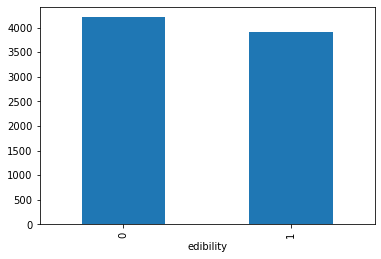

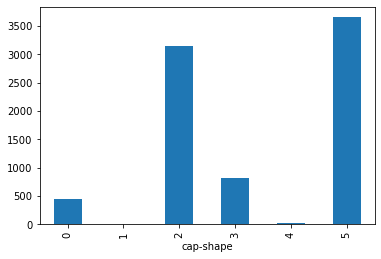

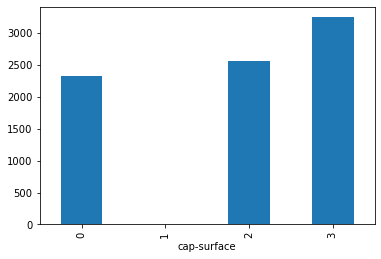

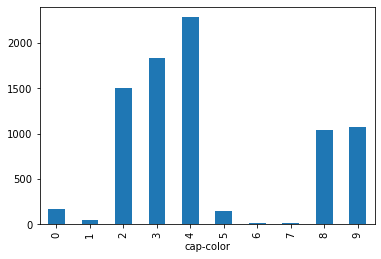

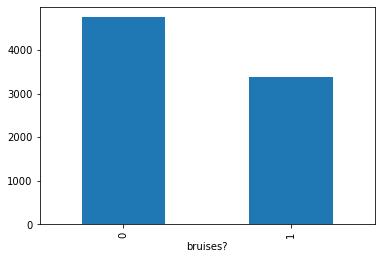

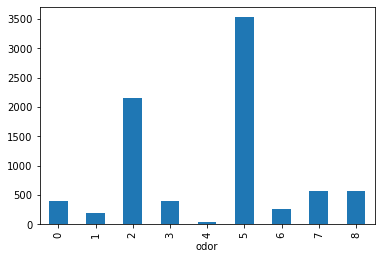

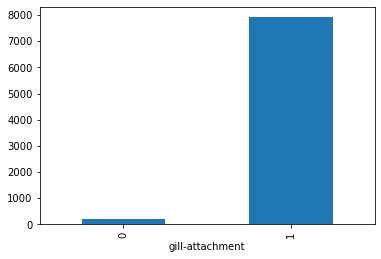

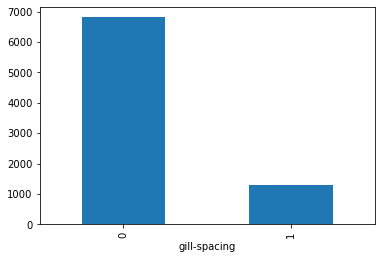

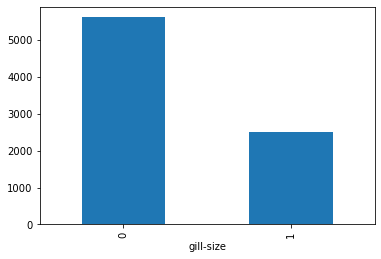

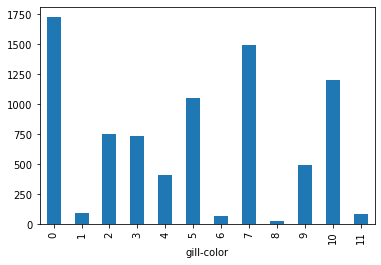

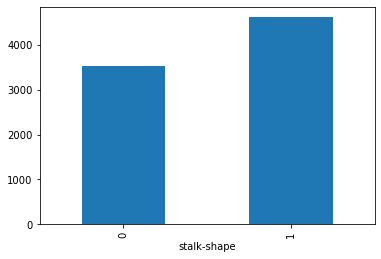

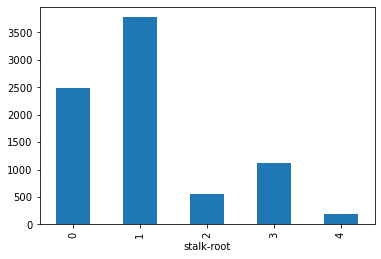

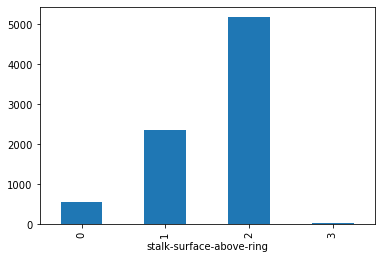

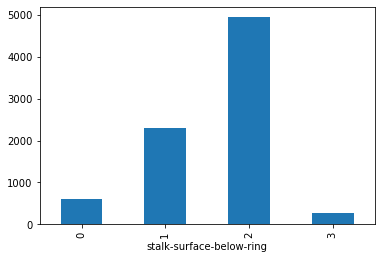

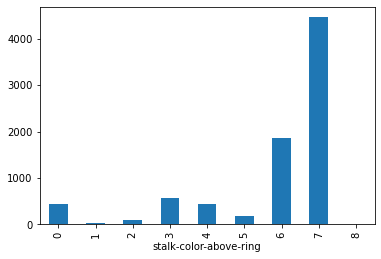

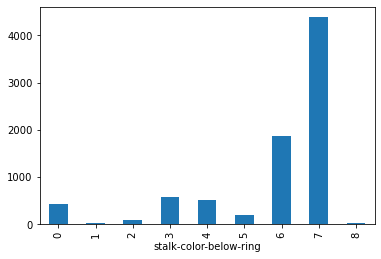

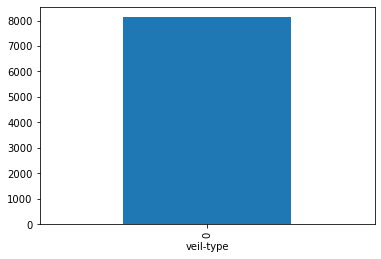

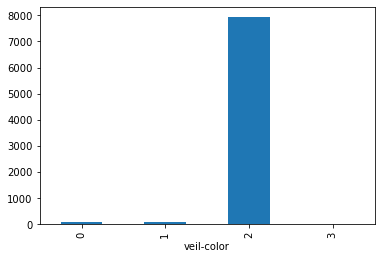

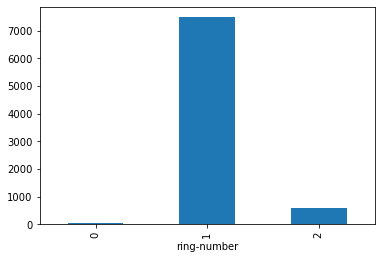

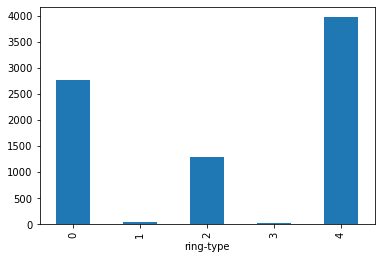

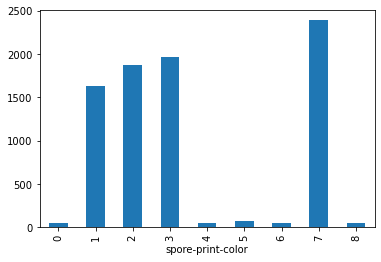

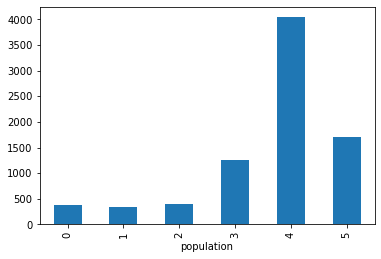

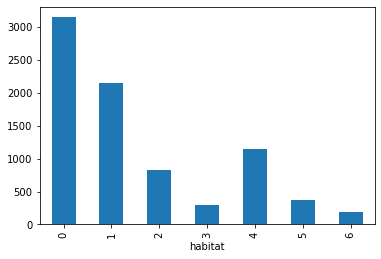

<Figure size 432x288 with 0 Axes>

In [4]:
# Visualizing the data
import matplotlib.pyplot as plt
for col in df:
    df.groupby(col).size().plot.bar(ax=plt.gca())
    plt.figure()